In [1]:
#importing librarys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')

In [2]:
# importing data
df = pd.read_csv("Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [7]:
# Check for Null Values:

print("No. of missing values: \n",df.isnull().sum())

No. of missing values: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
#Output shows that there are 11 total missing values in TotalCharges column.

In [9]:
# Fill the missing values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)

# Check for any existing missing values
print("Missing values now: \n", df.isnull().sum())

Missing values now: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Drop CustomerId column as it is not required
df.drop(['customerID'], axis = 1, inplace = True)

In [11]:
# Now let us work on categorical features. 
df.gender = [1 if x == "Male" else 0 for x in df.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df[col]=[1 if x == "Yes" else 0 for x in df[col]]

In [12]:
df.head(10)  # See how data looks like now

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [13]:
# Print correlation between all features and target variable
df.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

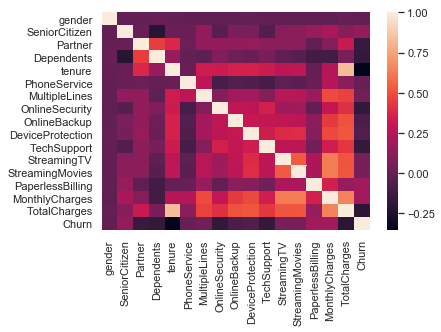

In [14]:
# Plot heatmap using Seaborn to visualize correlation amongst ftrs.
sns.heatmap(df.corr(), annot = False)

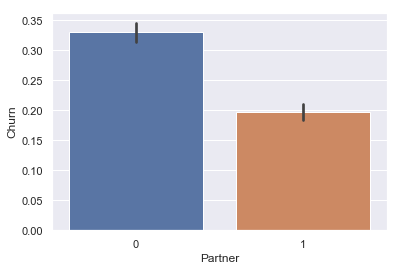

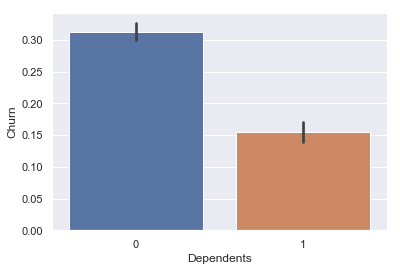

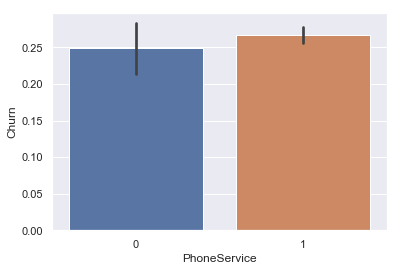

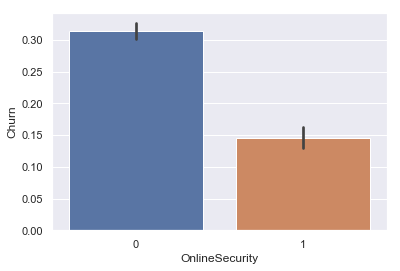

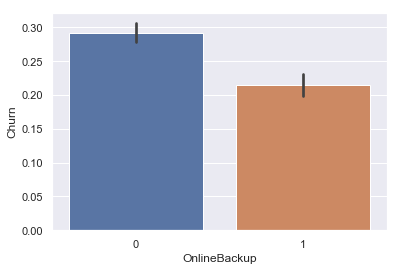

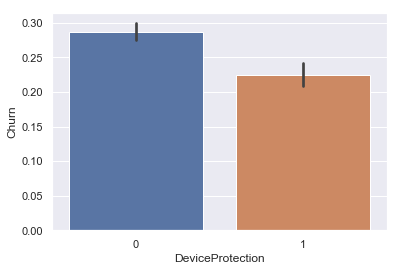

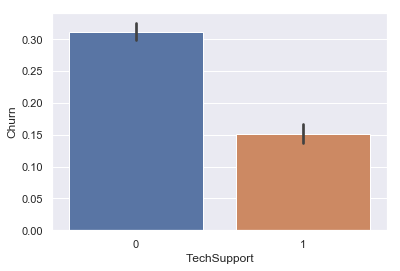

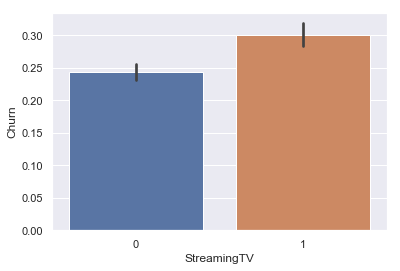

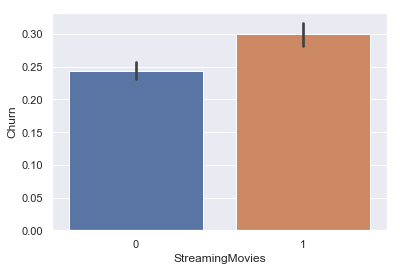

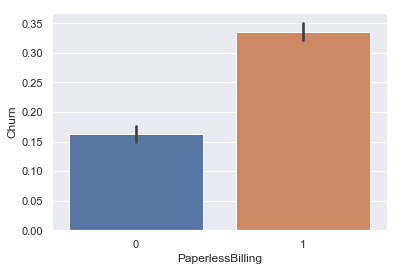

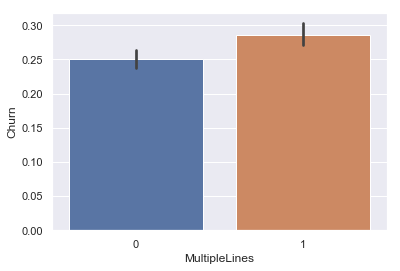

In [15]:
# For following features, let us generate bar plots w.r.t. target variable
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = col, y = 'Churn', data = df)
    plt.show() 

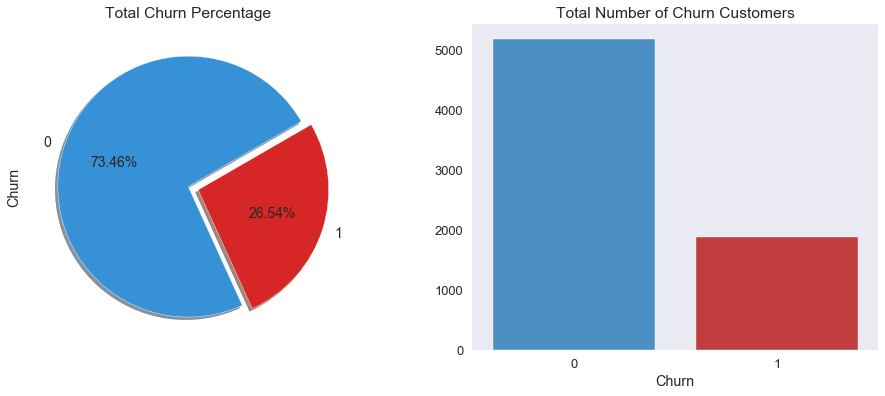

In [16]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))
df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#3791D7", "#D72626"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

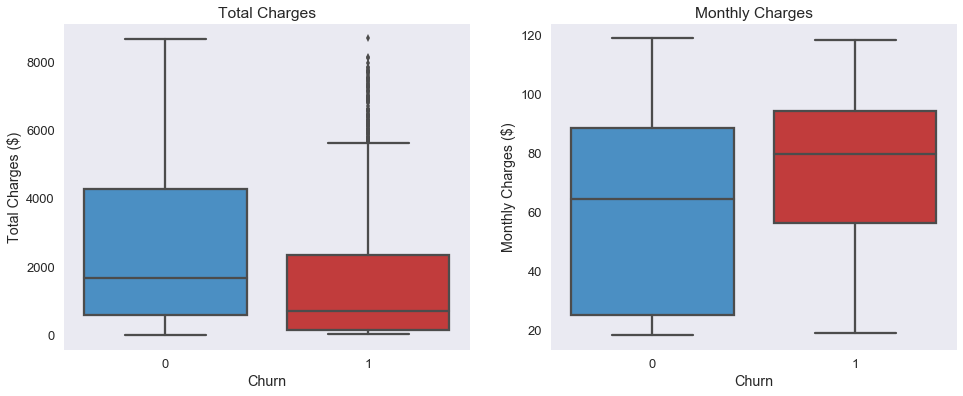

In [17]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=ax[0], palette=["#3791D7", "#D72626"])
ax[0].set_title('Total Charges')
ax[0].set_ylabel('Total Charges ($)')
ax[0].set_label('Churn')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Monthly Charges')
ax[1].set_ylabel('Monthly Charges ($)')
ax[1].set_label('Churn')

plt.show()

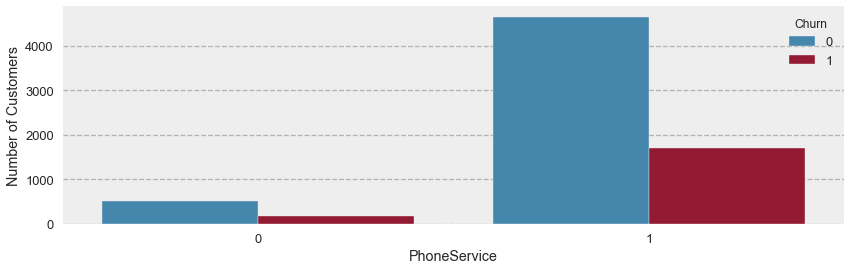

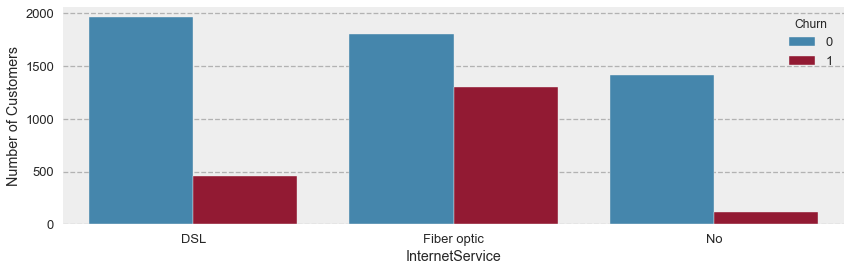

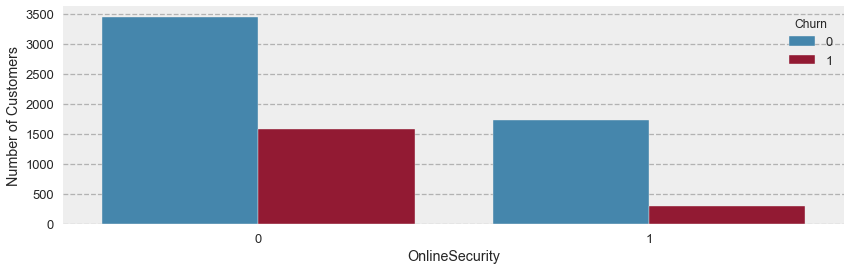

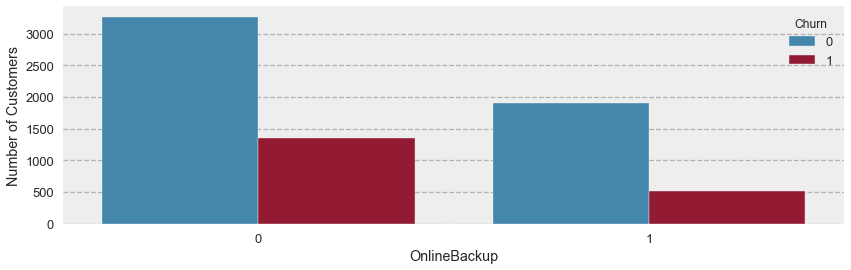

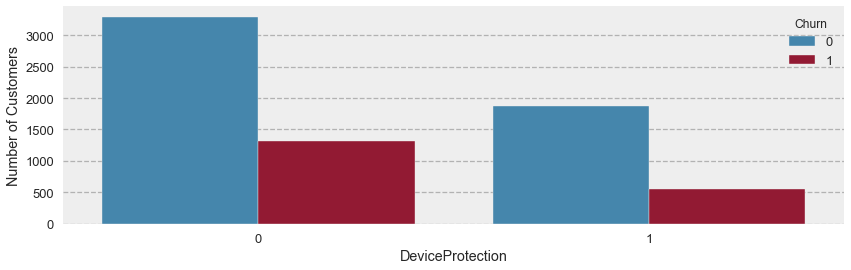

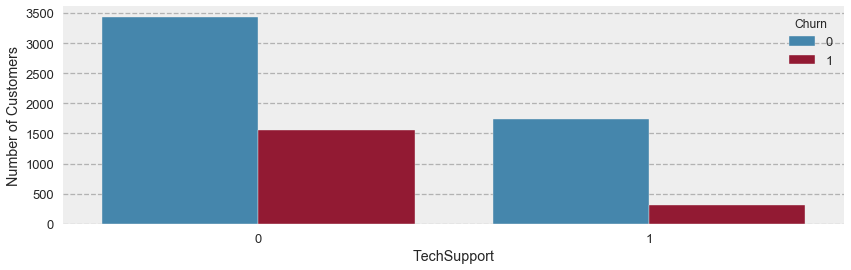

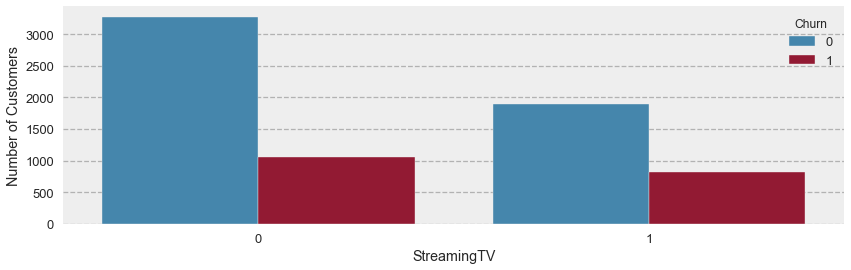

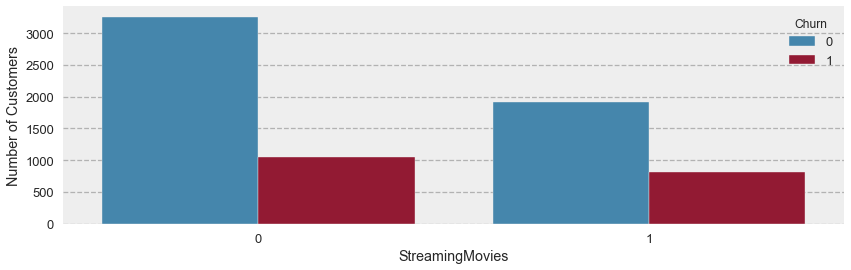

In [20]:
cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()

In [ ]:
#These plots show several patterns amongst these services. Most churn customers appear to have been paying for phone service. Regarding internet service, most of the churn customers had fiber optic services. Churn customers also followed the patterns of no online security, no online backup, no device protection, and no tech support. In terms of streaming services, not much can be concluded.

#Now that we have seen these patterns, let's look deeper into the costumers' contracts and payment methods.


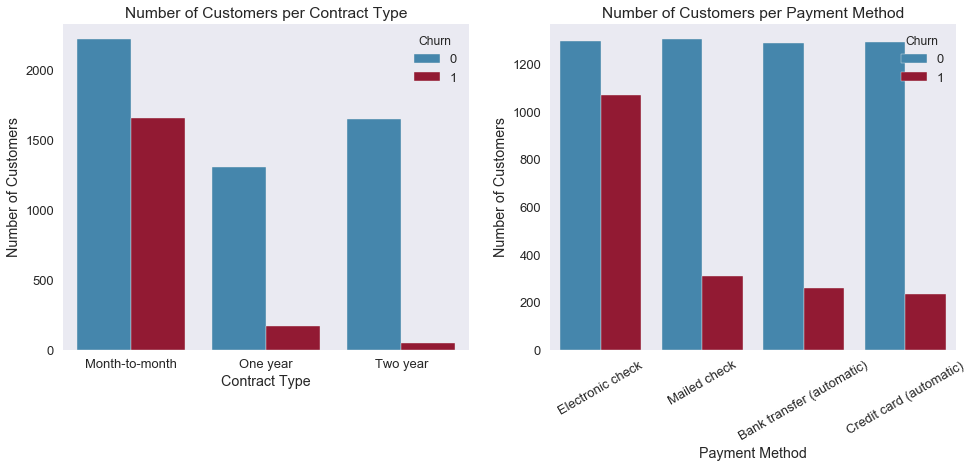

In [21]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[0])
ax[0].set_title('Number of Customers per Contract Type')
ax[0].set_xlabel('Contract Type')
ax[0].set_ylabel('Number of Customers')

sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 30)
ax[1].set_title('Number of Customers per Payment Method')
ax[1].set_xlabel('Payment Method')
ax[1].set_ylabel('Number of Customers')

plt.show()

In [ ]:
#Evidently, most churn customers payed by electronic checks, on month-to-month contracts.
#Since a clear majority of churn customers were on a month-to-month customer, let's check out how many months the customer has stayed with the company (tenure).

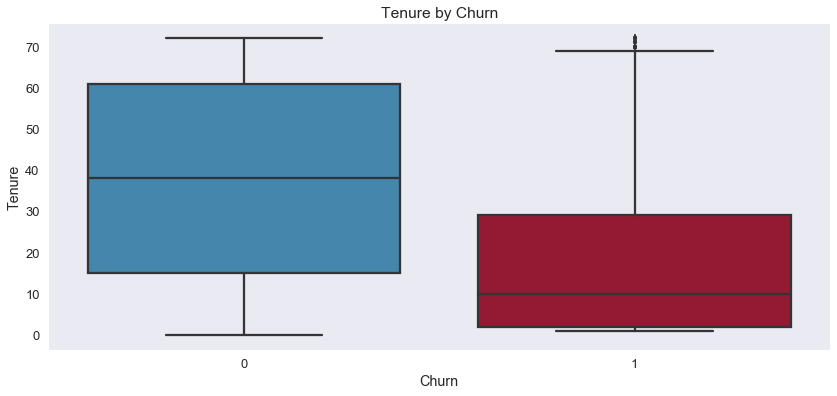

In [22]:
plt.figure(figsize=(14,6))

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

In [ ]:
#This shows that the churn customers appear to follow a trend of shorter tenure, which makes sense.

#Let's take a deeper look into who these customers are.

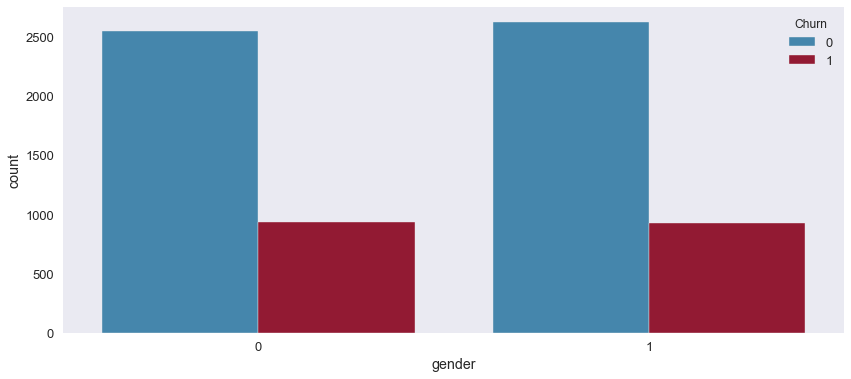

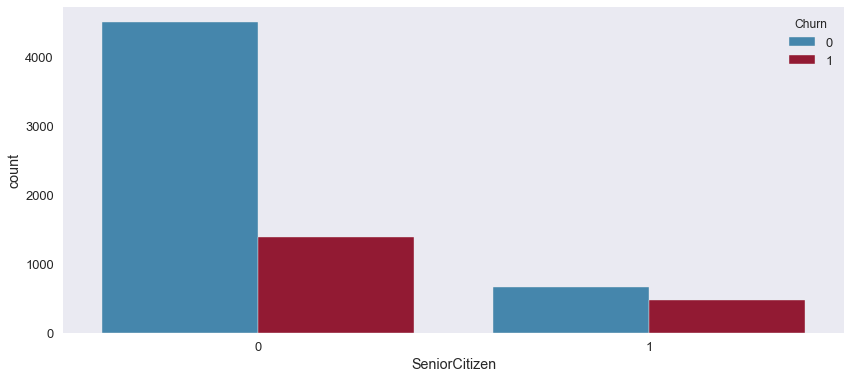

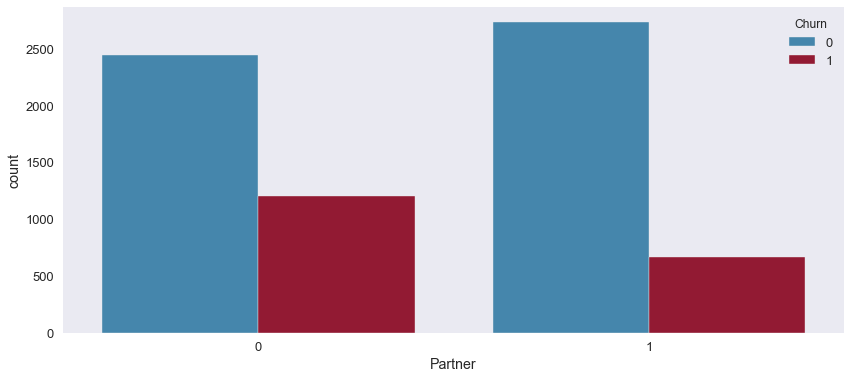

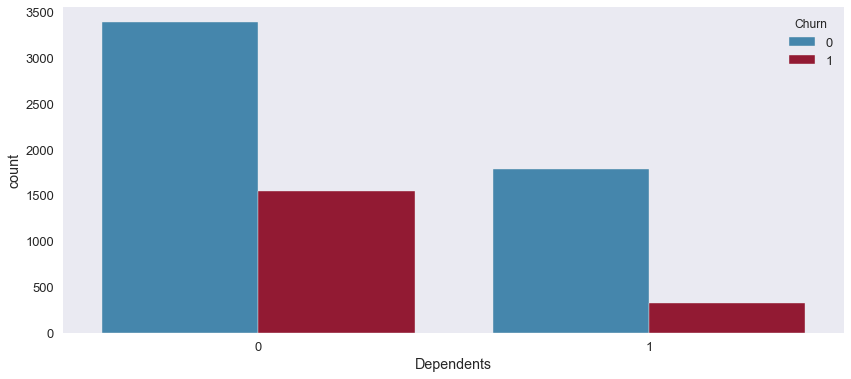

In [23]:
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(14,6))
    sns.countplot(x=i, data=df, hue='Churn')

In [ ]:
#We gather from this that churn customers appear to have no parter and no dependents

In [ ]:
#We have explored every given feature in our attempt to tell a story with this dataset. We have concluded the following:
#Churn Customers:
#Churn customers tend to lean towards month-to-month contracts and opt for one or two services, paying a higher monthly average with electronic checks.They also seem to mostly not have a partner or dependents.
#Potential Problems:
    #Customers who did churn showed a declining trend with increase in tenure period.
    #It is possible that month-to-month contracts have higher monthly charges. If this is the case, reducing the monthly charge for the month-to-month contract option would reduce customer churn rates.
    #It is possible that there is a problem wih the electronic check payment option, as it seems that it has a particularly high churn rate amongst the other options. This could be an electronic problem that could be looked into and fixed.

In [ ]:
#Predictive Analysis
#Up until now we have been simply telling a story with our data. This form of data analysis allows for a company to see exactly where they're at, and observe key points and patterns about their progress. However, this next part consists of predictions using machine learning algorithms, which is much more complicated.
#Not many businesses have the ability to predict the future of their investments. With this predictive analysis the telecommunications company will have a machine to help them decide the likeliness that a customer will churn, which could be useful information for a company that wants to reduce churn rates or predict future earnings.

In [24]:

#Engineering the Data for Modeling.Some of the services must be changed for the benefit of our model, without losing relevant information.

for i in ['OnlineSecurity','OnlineBackup','DeviceProtection',
          'TechSupport','StreamingTV','StreamingMovies']:
    df[i] = df[i].apply(lambda x: 'No' if x=='No internet service' else x)
    
df.MultipleLines=df.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)

In [25]:
# For variables with only two classifications:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in [e for e in df.columns if len(df[e].unique())==2]:
    df[i] = le.fit_transform(df[i])

In [26]:
# For variables with more than two classifications:
df = pd.get_dummies(df, columns = [i for i in df.columns if df[i].dtypes=='object'], drop_first=True)

In [27]:
#Resampling the Data
#It is important to notice that only 26.54% of customers have churned, making this an imbalanced class. We will deal with this by up-sampling the minority class ( churn = True ).

from sklearn.utils import resample

df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=5000,
                                random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print('Churn Count in Original Data: \n', df.Churn.value_counts(), '\n')
print('New Churn Count: \n', df_upsampled.Churn.value_counts())

Churn Count in Original Data: 
 0    5174
1    1869
Name: Churn, dtype: int64 

New Churn Count: 
 0    5174
1    5000
Name: Churn, dtype: int64


In [28]:
#Splitting the Data

#Before applying any machine learning models, the data must be split for the purpose of training and testing on itself.

from sklearn.model_selection import train_test_split

# Separate input features (X) and target variable (y)
y = df_upsampled.Churn
X = df_upsampled.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.30)



In [29]:

#Machine Learning Models

#We will now investigate the predictive results of several models to see which algorithm works best for our predictive analysis.

    #Random Forest : RandomForestClassifier
    #Naive Bayes : GaussianNB
    #Logistic Regression : LogisticRegression
    #K-Neighbors : KNeighborsClassifier

from sklearn.metrics import classification_report, precision_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
classifier_list = [ LogisticRegression(),
                    KNeighborsClassifier(),
                    GaussianNB(priors=None),
                    RandomForestClassifier()]

for clf in classifier_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    precision = precision_score(y_test, predictions) 
    accuracy = accuracy_score(y_test, predictions)
    
    
# Precision_score = tp / (tp + fp)
# Accuracy_score = (# of correctly assigned rows) / (All rows)

    print(clf, '\n \n',classification_report(y_test, predictions), 
          '\n \nPrecision Score: ' , precision,
          '\nAccuracy Score: ', accuracy,
          '\n\n----------------------------------------------------------------\n\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1564
           1       0.75      0.79      0.77      1489

   micro avg       0.77      0.77      0.77      3053
   macro avg       0.77      0.77      0.77      3053
weighted avg       0.77      0.77      0.77      3053
 
 
Precision Score:  0.7455808080808081 
Accuracy Score:  0.7671143137897151 

----------------------------------------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') 
 
               precision    recall  f1-score   support

           0       0.78      0.70

In [ ]:
#The Random Forest Classifier appears to be the most accurate.